In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import math 

In [4]:
diamonds = sns.load_dataset("diamonds")
exercise= sns.load_dataset("exercise")
flights= sns.load_dataset("flights")
geyser= sns.load_dataset("geyser")
iris= sns.load_dataset("iris")
penguins= sns.load_dataset("penguins")
planets= sns.load_dataset("planets")
mpg= sns.load_dataset("mpg")
tips= sns.load_dataset("tips")
titanic= sns.load_dataset("titanic")

# Categorical Plots

In [5]:
#bar plot
#count plot
#boxplot
#violinplot
#strip plot

# barplot

In [6]:
# Show point estimates and confidence intervals as rectangular bars.

In [11]:
label = ["G1", "G2", "G3", "G4", "G5", "G6"]
men_means = [20,34,30,35,27]
women_means=[25,32,34,20,25]

In [12]:
df = pd.DataFrame(list(zip(label, men_means, women_means)), columns = ["label", "men_means", "women_means"])

In [13]:
df

,label,men_means,women_means
0,G1,20,25
1,G2,34,32
2,G3,30,34
3,G4,35,20
4,G5,27,25


<BarContainer object of 5 artists>

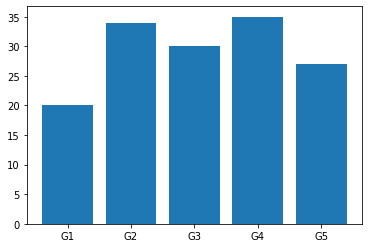

In [14]:
plt.bar(df.label, df.men_means)

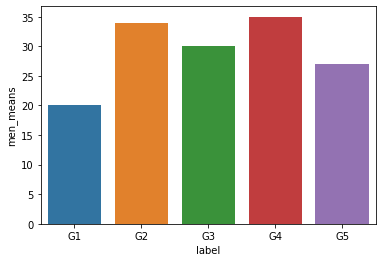

In [15]:
sns.barplot(df.label, df.men_means)#metot 1

# en sık kullanılan yöntem

In [16]:
# method 2

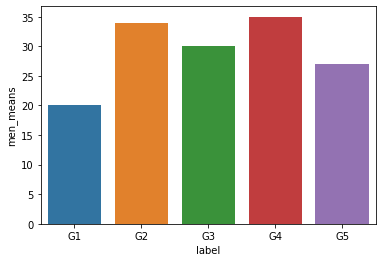

In [17]:
sns.barplot("label", "men_means", data = df)

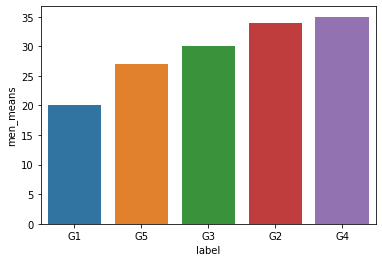

In [13]:
sns.barplot("label", "men_means", data = df, order = ["G1","G5","G3","G2","G4"])

In [14]:
df.sort_values(by= ["men_means"]).label

0    G1
4    G5
2    G3
1    G2
3    G4
Name: label, dtype: object

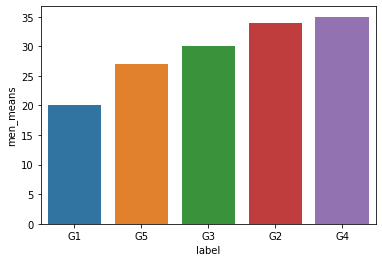

In [15]:
sns.barplot("label", "men_means", order = df.sort_values("men_means").label, data = df)

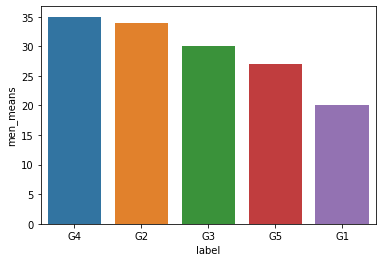

In [16]:
sns.barplot("label", "men_means", order = df.sort_values("men_means", ascending = False).label, data = df)

In [17]:
df

,label,men_means,women_means
0,G1,20,25
1,G2,34,32
2,G3,30,34
3,G4,35,20
4,G5,27,25


# adding estimator

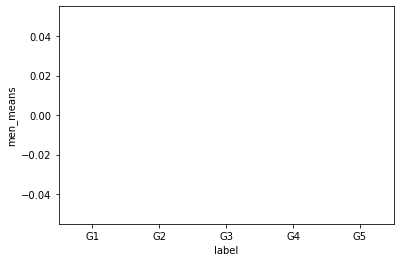

In [18]:
sns.barplot(x="label", y="men_means", data=df, estimator=np.std)

In [19]:
x= ['JavaScript','HTML/CSS', 'SQL', 'Python','Java','Bash/Shel/PS', 'C#','PHP', 'C++', 'TypeScript', 'C', 'Other(s):','Ruby', 'Go',
 'Assembly']

In [20]:
y=[59219, 55466,  47544, 36443, 35917, 31991, 27097,23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]

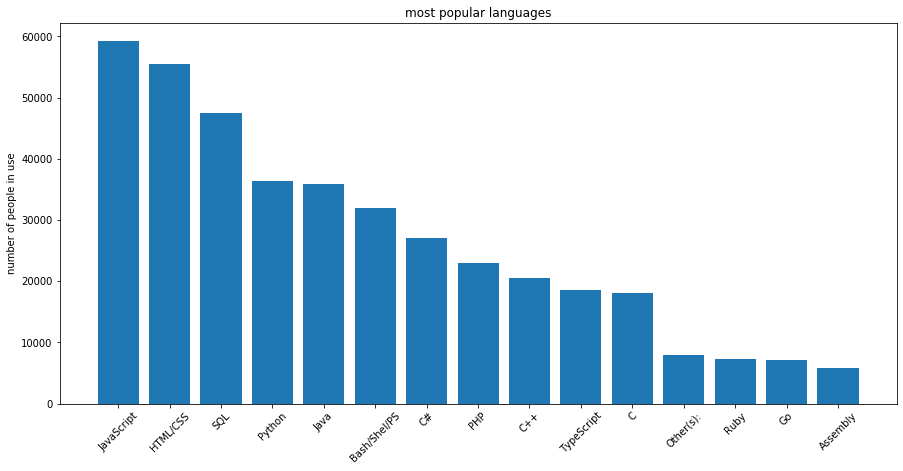

In [21]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(x,y)
ax.set_title("most popular languages")
ax.set_ylabel("number of people in use")
ax.set_xticklabels(x, rotation=45);

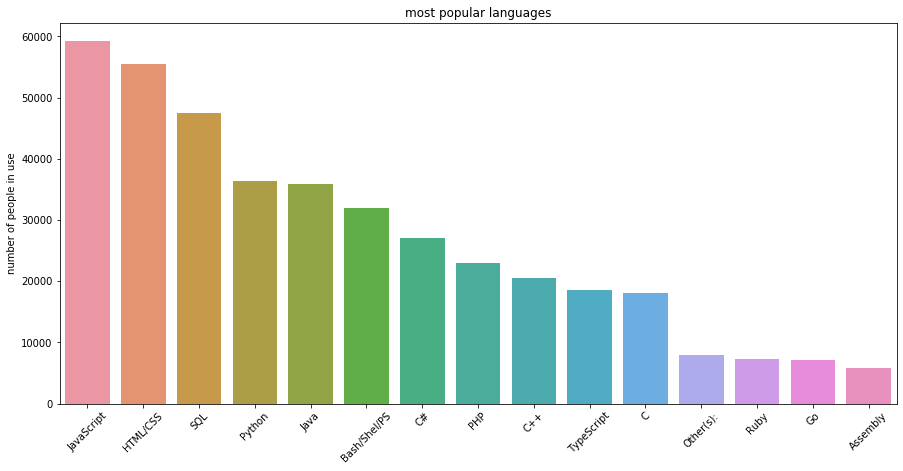

In [22]:
fig,ax = plt.subplots(figsize=(15,7))
sns.barplot(x,y, ax=ax)
ax.set_title("most popular languages")
ax.set_ylabel("number of people in use")
ax.set_xticklabels(x, rotation=45);

# bar plot(actual)

In [23]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tips.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [25]:
tips.groupby("sex")["total_bill"].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

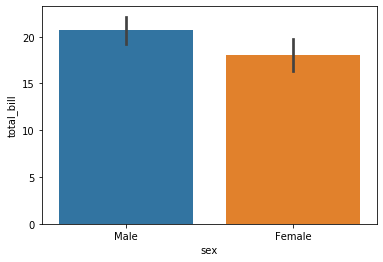

In [26]:
sns.barplot(x="sex", y="total_bill", data=tips)#sns barplot kümeleyip, ortalamasına göre plotlar, ci ekler. 

In [27]:
tips.groupby("sex")["total_bill"].std()

sex
Male      9.246469
Female    8.009209
Name: total_bill, dtype: float64

In [28]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [29]:
math.sqrt(9)

3.0

In [30]:
def ci (x, z, s, n):
    return(x+(z*s/math.sqrt(n)))

In [31]:
ci(20.7, 1.96, 9.24, 157)

22.145367271246243

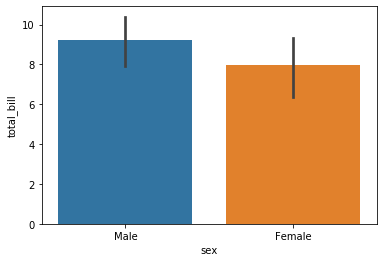

In [32]:
sns.barplot(x="sex", y="total_bill", data=tips, estimator=np.std)

In [33]:
tips.groupby("sex")["total_bill"].std()

sex
Male      9.246469
Female    8.009209
Name: total_bill, dtype: float64

# pandas ile çizim

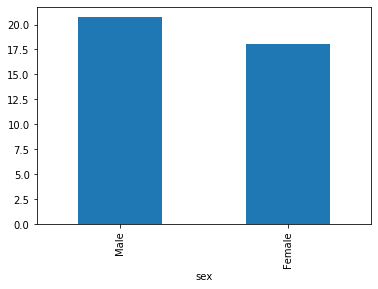

In [34]:
tips.groupby("sex")["total_bill"].mean().plot.bar()

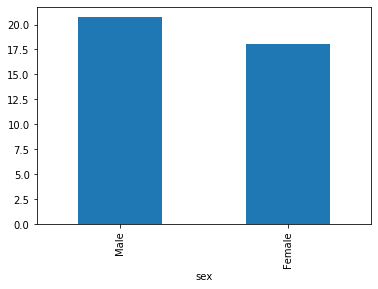

In [35]:
tips.groupby("sex")["total_bill"].mean().plot(kind="bar")

# with matplotlib

In [36]:
aa=tips.groupby("sex")["total_bill"].mean()

In [37]:
aa

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [38]:
aa.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, name='sex', dtype='category')

In [39]:
aa.values

array([20.74407643, 18.05689655])

<BarContainer object of 2 artists>

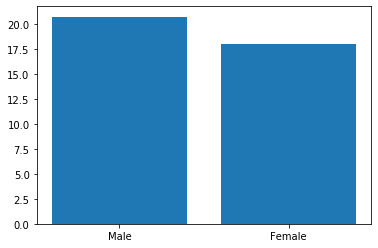

In [40]:
plt.bar(aa.index, aa.values)

<BarContainer object of 2 artists>

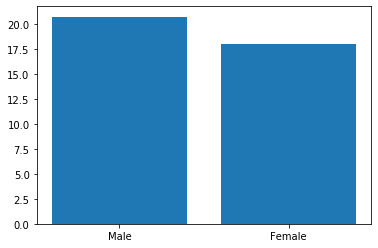

In [41]:
plt.bar((tips.groupby("sex")["total_bill"].mean().index),(tips.groupby("sex")["total_bill"].mean().values))

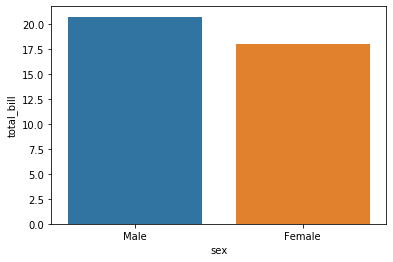

In [42]:
sns.barplot(x="sex", y="total_bill", ci= None, data=tips)

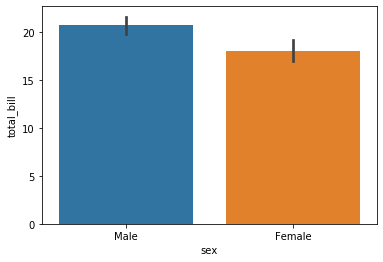

In [43]:
sns.barplot(x="sex", y="total_bill", ci= 80, data=tips)

In [44]:
import math

In [45]:
ci = 20+(1.96*9.2/math.sqrt(244))

In [46]:
ci

21.15438050947499

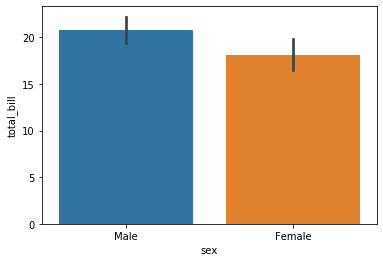

In [47]:
sns.barplot(x="sex", y="total_bill", ci= 95, data=tips)

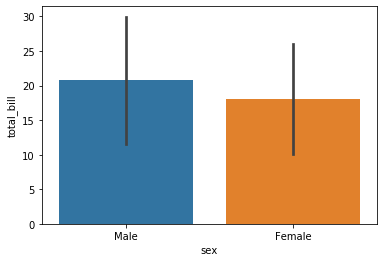

In [48]:
sns.barplot(x="sex", y="total_bill", ci= "sd", data=tips)#If "sd", skip bootstrapping and draw the standard deviation of the observations. 

# hue parametresi

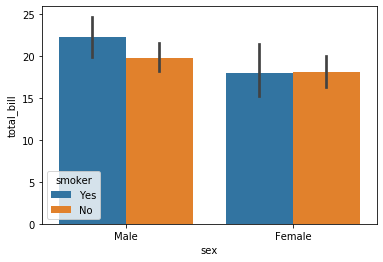

In [49]:
sns.barplot(x="sex", y="total_bill", data=tips, hue= "smoker")

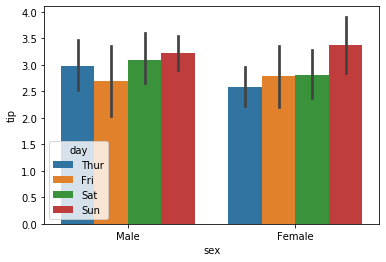

In [50]:
sns.barplot(x="sex", y="tip",hue="day", data=tips, ci=95)

In [51]:
# compare avg tip each day

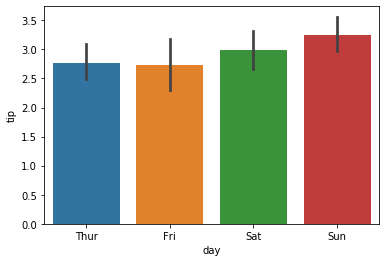

In [52]:
sns.barplot(x="day", y="tip", data=tips)

In [80]:
import numpy as np

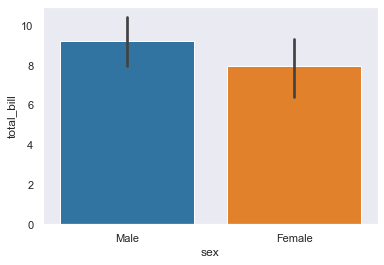

In [81]:
sns.barplot(x="sex", y="total_bill", data=tips, estimator=np.std)

In [53]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [54]:
# compare avg horsepower for each cylinder type

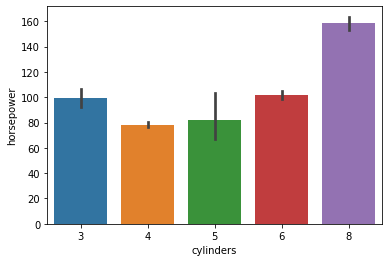

In [55]:
sns.barplot(x="cylinders", y= "horsepower", data=mpg)

In [56]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


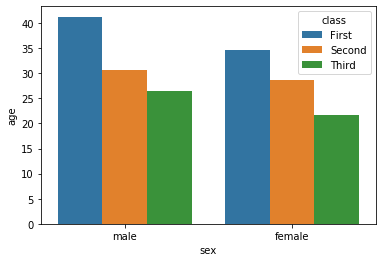

In [57]:
sns.barplot(x="sex", y="age", cai= None, hue="class", data=titanic)

# scatter plot

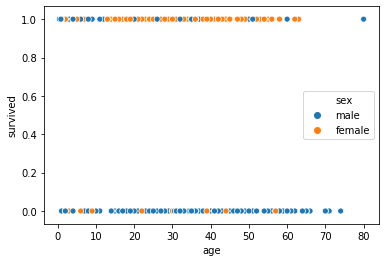

In [58]:
sns.scatterplot(x="age", y="survived", hue="sex", data=titanic)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(start = 0, stop = 5, num= 11)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [7]:
y = x**2
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

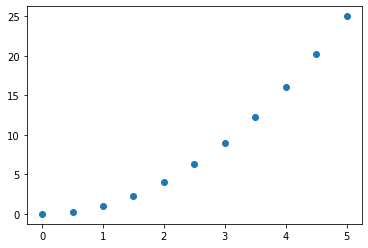

In [26]:
plt.plot(x,y, marker = "o", linestyle = "")

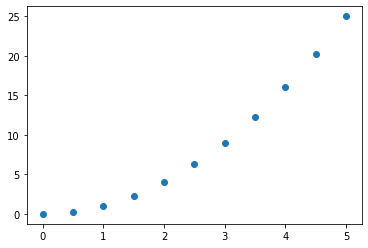

In [9]:
plt.scatter(x,y)

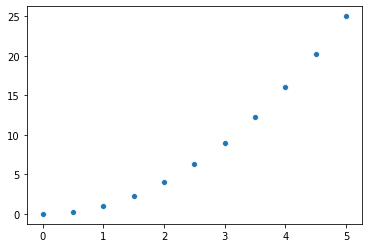

In [10]:
sns.scatterplot(x,y)

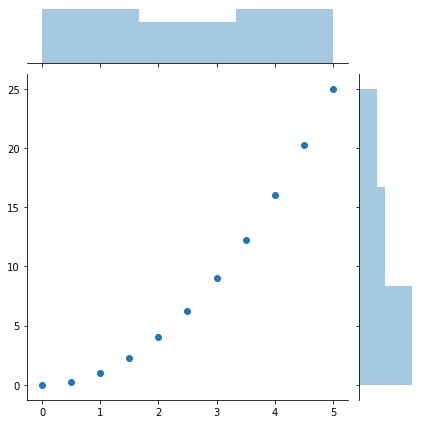

In [13]:
sns.jointplot(x,y, kind = "scatter")

In [14]:
x,y

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
        20.25, 25.  ]))

In [24]:
df = pd.DataFrame(data = zip(x,y), columns = ["x", "y"])
df

,x,y
0,0.0,0.00
1,0.5,0.25
2,1.0,1.00
3,1.5,2.25
4,2.0,4.00
5,2.5,6.25
6,3.0,9.00
7,3.5,12.25
8,4.0,16.00
9,4.5,20.25


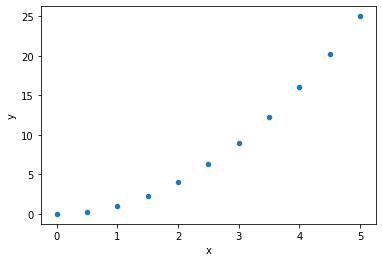

In [25]:
df.plot(x = "x", y ="y", kind = "scatter")

# countplot

In [82]:
# categorical

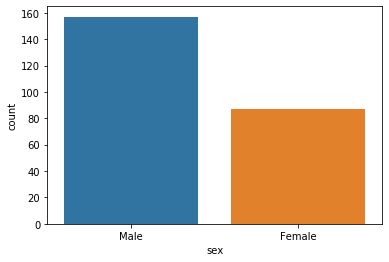

In [58]:
sns.countplot(x="sex", data=tips)#Show the counts of observations in each categorical bin using bars.

In [59]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

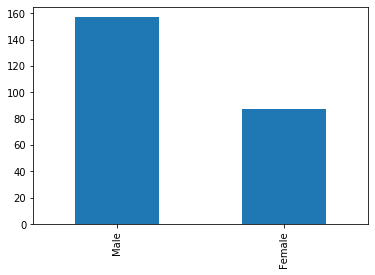

In [60]:
tips.sex.value_counts().plot(kind="bar")

In [61]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [62]:
mpg.cylinders.value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

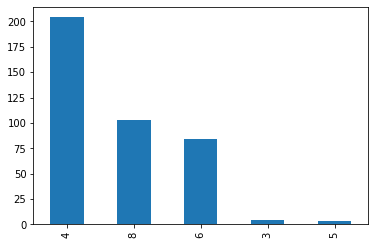

In [63]:
mpg.cylinders.value_counts().plot(kind="bar")

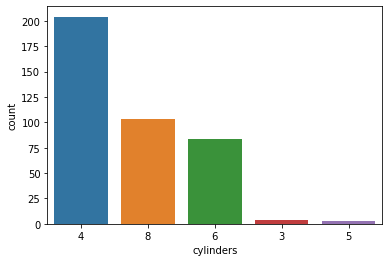

In [64]:
sns.countplot(x="cylinders", order =[4,8,6,3,5], data=mpg)

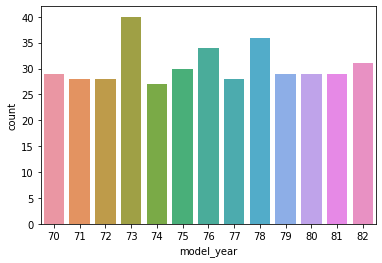

In [65]:
sns.countplot(x="model_year", data=mpg)

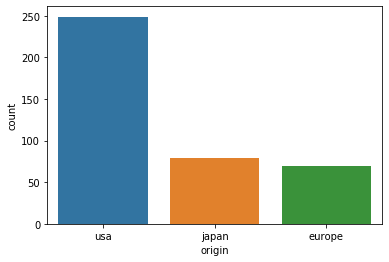

In [66]:
sns.countplot(x= "origin", data=mpg)

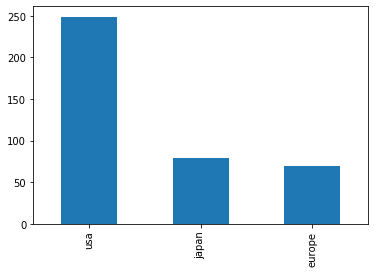

In [67]:
mpg.origin.value_counts().plot(kind ="bar")

# box and violin plot

In [68]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


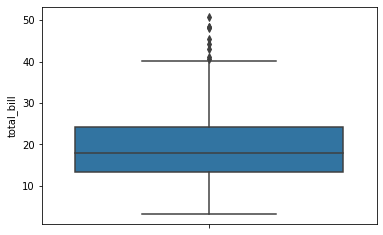

In [69]:
sns.boxplot(tips["total_bill"], orient = "v")

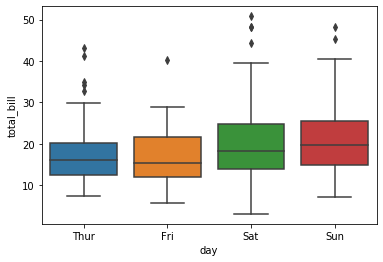

In [70]:
sns.boxplot(x="day", y = "total_bill", data= tips, orient = "v")

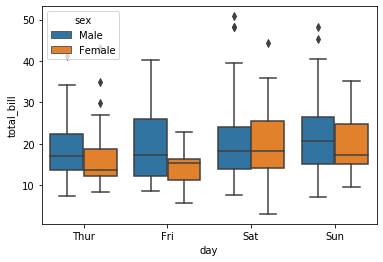

In [71]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)

In [72]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


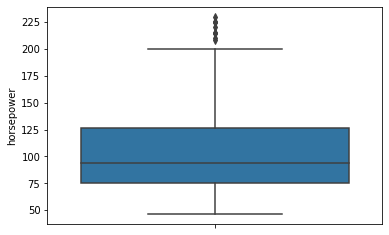

In [73]:
sns.boxplot(x="horsepower", data=mpg, orient="v")

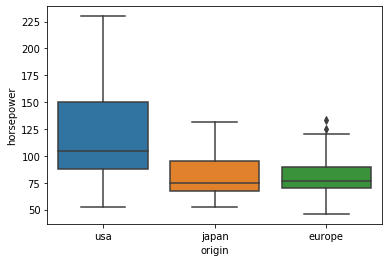

In [74]:
sns.boxplot(x="origin", y="horsepower", data=mpg)

# violinplot

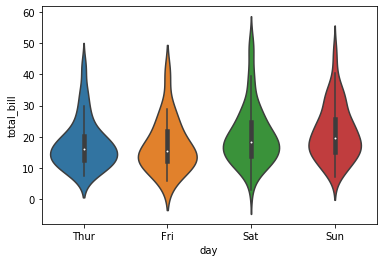

In [75]:
sns.violinplot(x="day", y="total_bill", data=tips)

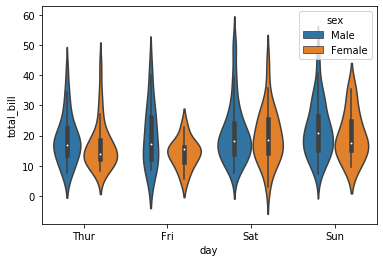

In [76]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex")

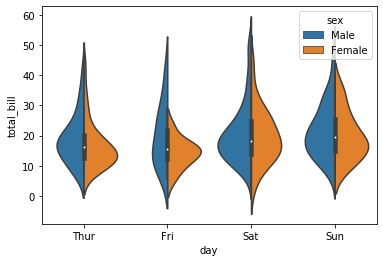

In [77]:
sns.violinplot(x="day", y="total_bill", data=tips, split=True,  hue="sex")

# stripplot

In [78]:
# Draw a scatterplot where one variable is categorical.

In [78]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


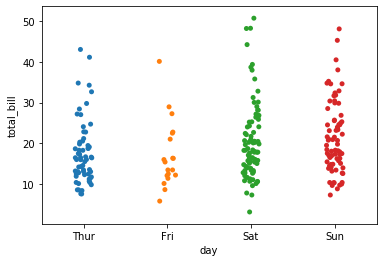

In [79]:
sns.stripplot(x="day", y="total_bill", data=tips)

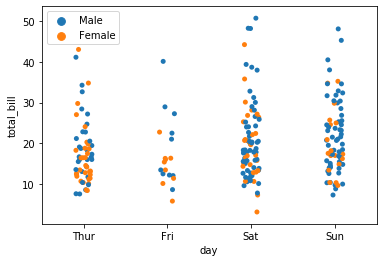

In [80]:
sns.stripplot(x="day", y="total_bill", hue= "sex", data=tips)
plt.legend(loc=2)

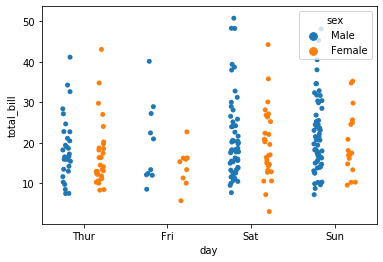

In [81]:
sns.stripplot(x="day", y="total_bill", hue= "sex", dodge = True, data=tips)

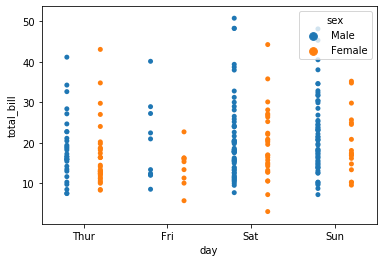

In [82]:
sns.stripplot(x="day", y="total_bill", hue= "sex", dodge = True, jitter = False, data=tips)

In [83]:
# swarmplot=strip+violinplot

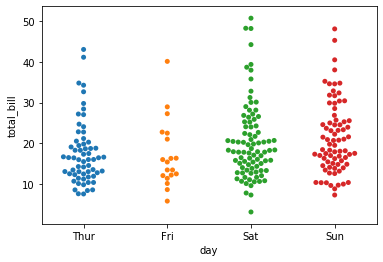

In [84]:
sns.swarmplot(x="day", y="total_bill", data=tips)

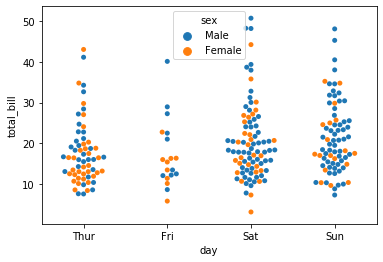

In [85]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

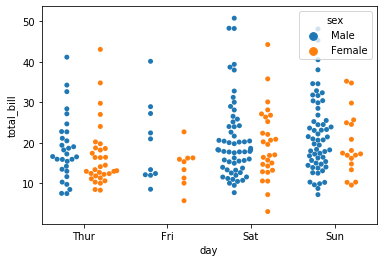

In [86]:
sns.swarmplot(x="day", y="total_bill", hue="sex", dodge=True, data=tips)

In [87]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


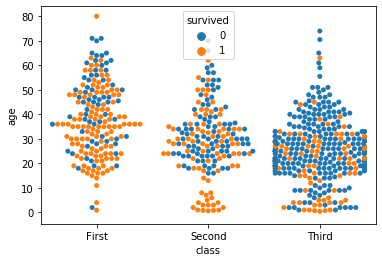

In [88]:
sns.swarmplot(x="class", y="age", hue="survived", data = titanic)

# catplot

In [89]:
# faktorplot

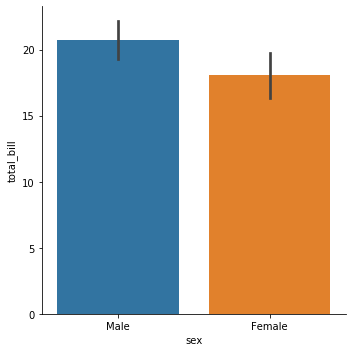

In [90]:
sns.catplot(x="sex", y="total_bill", data=tips, kind="bar")

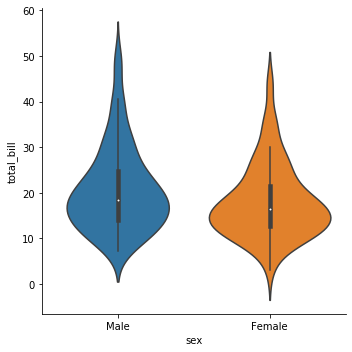

In [91]:
sns.catplot(x="sex", y="total_bill", data=tips, kind="violin")

In [92]:
# pointplot

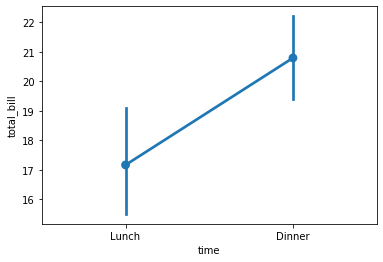

In [93]:
sns.pointplot(x="time", y="total_bill", data=tips)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


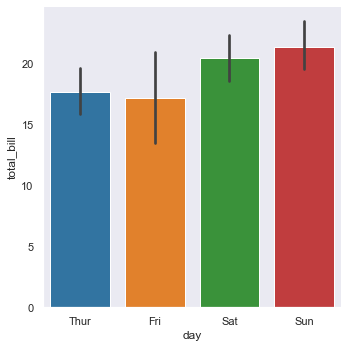

In [84]:
sns.factorplot(x="day", y="total_bill", data=tips, kind="bar")

In [94]:
# exercises

In [95]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


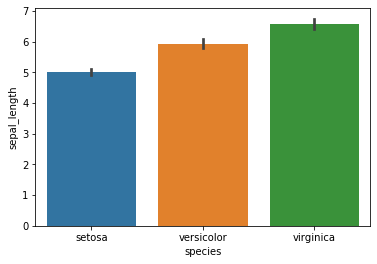

In [96]:
sns.barplot(x="species", y="sepal_length", data = iris)

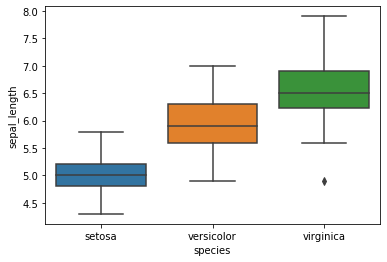

In [97]:
sns.boxplot(x="species", y="sepal_length", data = iris)

# Distribution Plots
#Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are: --> -->

In [98]:
# distplot
# jointplot
# pairplot
# rugplot
# kdeplot

# displot

In [99]:
#Allows us to show the distribution of a univariate -one variable- set of observations.

In [100]:
#allows to visualize the distribution, essentially histogram

In [101]:
%matplotlib inline

In [102]:
tips=sns.load_dataset("tips")

In [103]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


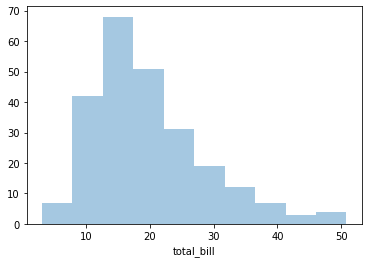

In [104]:
sns.distplot(tips["total_bill"], kde=False, bins=10)

In [105]:
#without kde you have a histogram- just a distribution of where your total bill lies.

# Example

In [106]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [107]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [108]:
penguins.shape

(344, 7)

In [109]:
penguins.dropna(inplace=True)

In [110]:
penguins.shape

(333, 7)

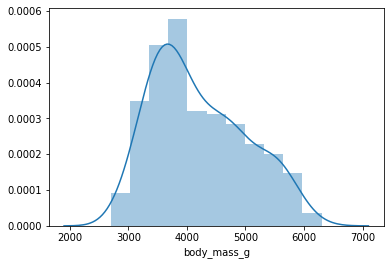

In [111]:
sns.distplot(penguins["body_mass_g"])

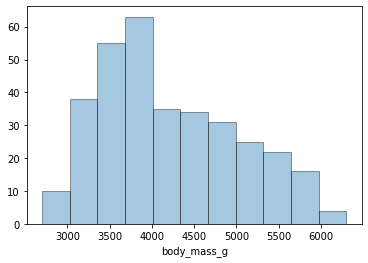

In [112]:
sns.distplot(penguins["body_mass_g"], hist_kws=dict(edgecolor = "k", lw = 1), kde=False)

(array([14., 42., 69., 52., 41., 39., 27., 27., 16.,  6.]),
 array([2700., 3060., 3420., 3780., 4140., 4500., 4860., 5220., 5580.,
        5940., 6300.]),
 <a list of 10 Patch objects>)

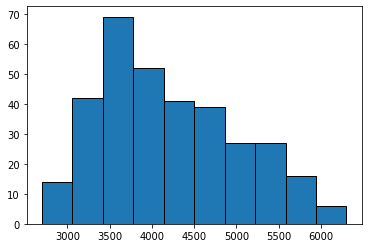

In [113]:
plt.hist(penguins["body_mass_g"], edgecolor="black")

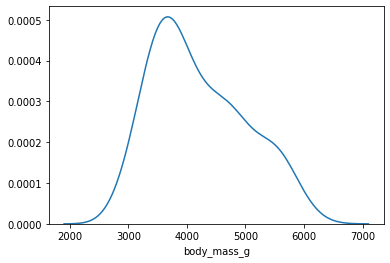

In [114]:
sns.distplot(penguins["body_mass_g"], hist = False)

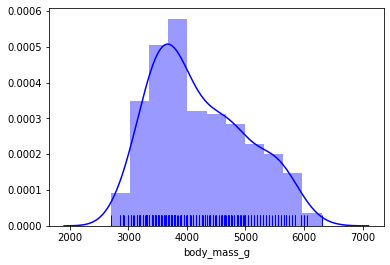

In [115]:
sns.distplot(penguins["body_mass_g"], rug=True, color="b")

In [116]:
mean = penguins["body_mass_g"].mean()

Text(0.5, 0, 'Body Mass in Gram')

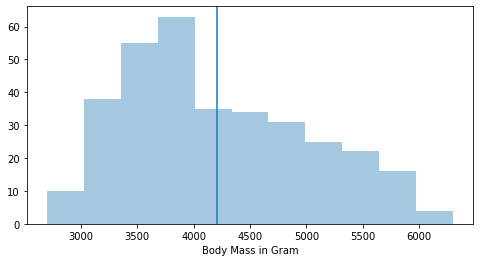

In [117]:
fig, ax  = plt.subplots(figsize=(8,4))
sns.distplot(penguins["body_mass_g"], kde = False, ax=ax)
ax.axvline(mean)
ax.set_xlabel("Body Mass in Gram")

# Jointplot

In [118]:
# two dist plot 

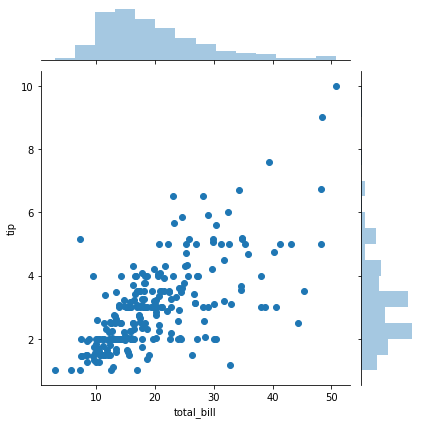

In [119]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter")#default kind scatter'dır. okuması en kolay grafik

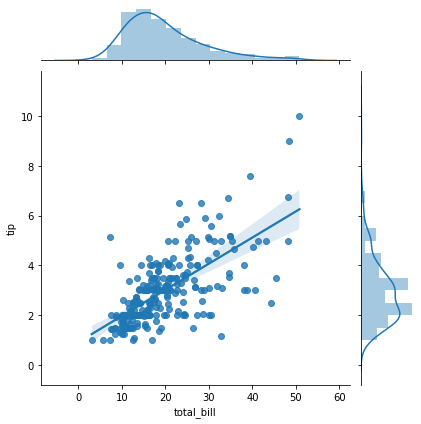

In [120]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

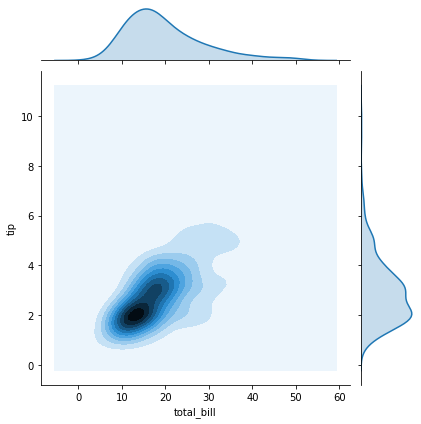

In [121]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")#shows the density of where these points match up most, dark area

# Pairplot

In [122]:
# many joint plot

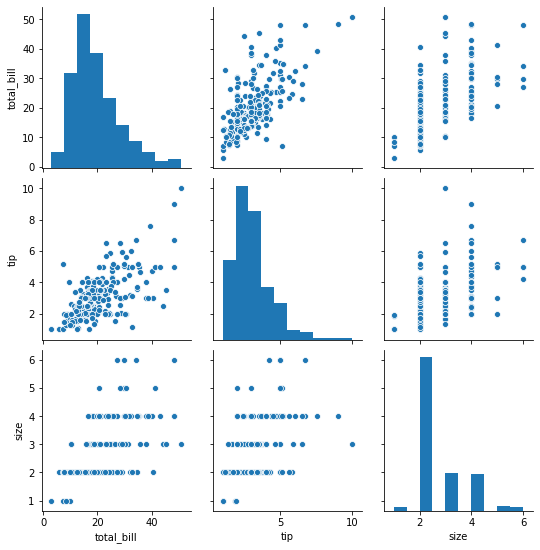

In [123]:
sns.pairplot(tips)#pairplot df de bulunan tüm numerik değerlerin birbiri ile ilişkisini gösterir. 

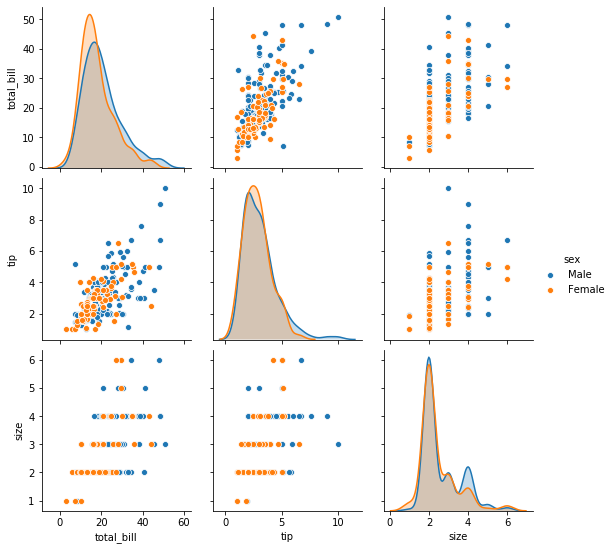

In [124]:
sns.pairplot(tips, hue="sex")#hue argumenti analize kategorik verinin etkisini gösterir. 

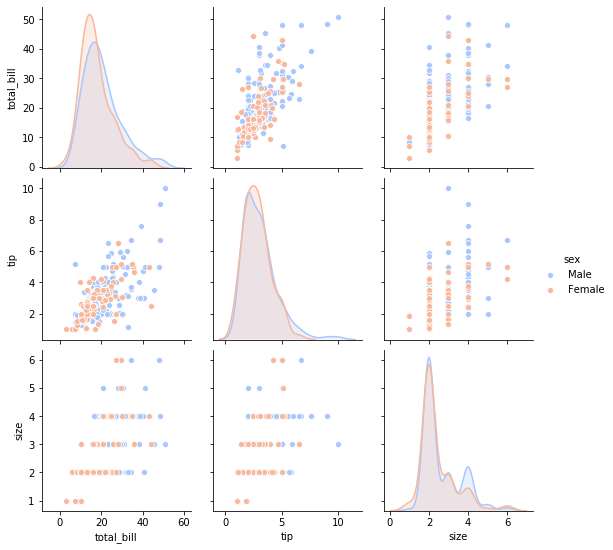

In [125]:
sns.pairplot(tips, hue="sex", palette="coolwarm")

# Rugplot

In [126]:
#histogram value sayılarını y ekseninde gösteriyordu. rug plot yerde yani x ekseninde gösterir. 

In [127]:
#herbir veri için bir çizgi atar x eksenine

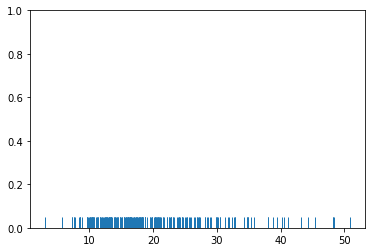

In [128]:
sns.rugplot(tips["total_bill"])

# kde plot

In [129]:
# kde: just sum of all nds around rug plot. 

In [130]:
#rug çizgilerini kullanarak kernel density estimation- kde eğrisi elde edicez. 

In [131]:
#rugplot counts KDE plots

(0, 1)

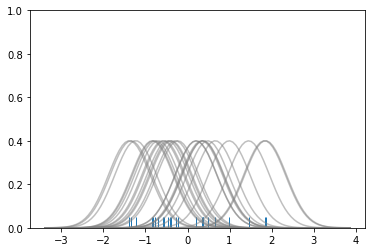

In [132]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [133]:
# şimdi bu küçük nd'lerin toplanma zamanı dostum

Text(0.5, 0.98, 'Sum of the Basis Functions')

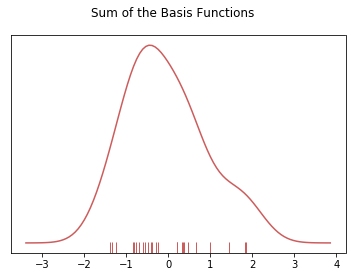

In [134]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

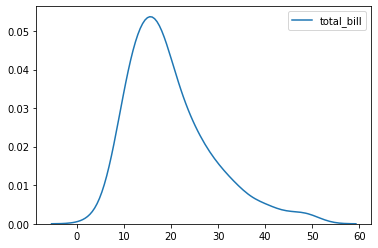

In [137]:
sns.kdeplot(tips["total_bill"])#veri distributionumu histogramsız istersem böyle çizilir.

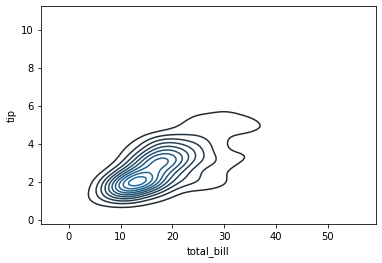

In [139]:
sns.kdeplot(tips["total_bill"], tips["tip"])

# linear model plot

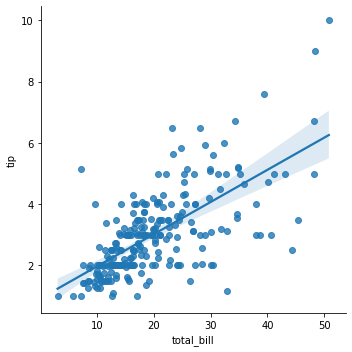

In [136]:
sns.lmplot("total_bill", "tip", data=tips)

# matrix plot

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [9]:
#matrix plot için verinin matrix hale gelmesi gerek. 

In [11]:
tips.corr() # verinin matrix hale gelmesi için bir yöntem bu

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


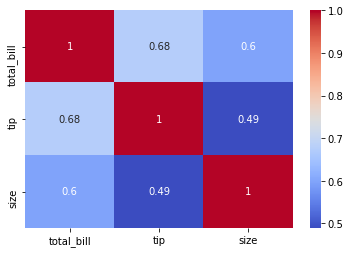

In [14]:
sns.heatmap(tips.corr(), annot=True, cmap="coolwarm")

In [15]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [16]:
flights.pivot_table(index="month", columns = "year", values="passengers")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [20]:
fp =flights.pivot_table(index="month", columns = "year", values="passengers")

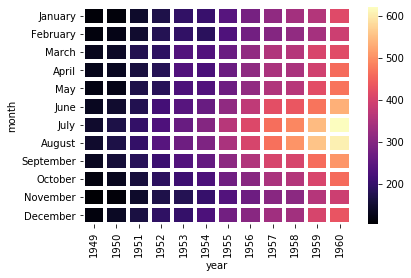

In [22]:
sns.heatmap(fp, cmap="magma", linecolor="white", linewidths=3)

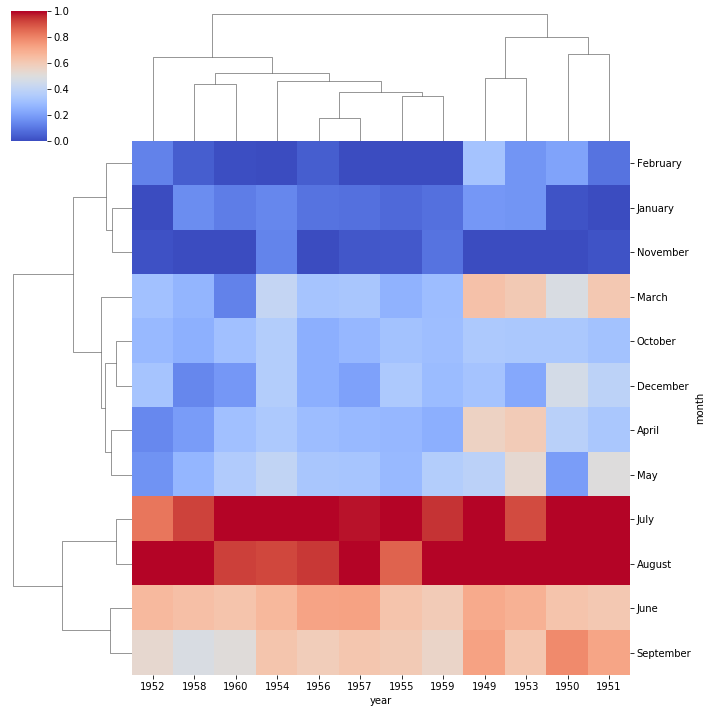

In [27]:
sns.clustermap(fp, cmap="coolwarm", standard_scale=1)

# Grid

In [ ]:
# Pairplot: automated jointplot

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

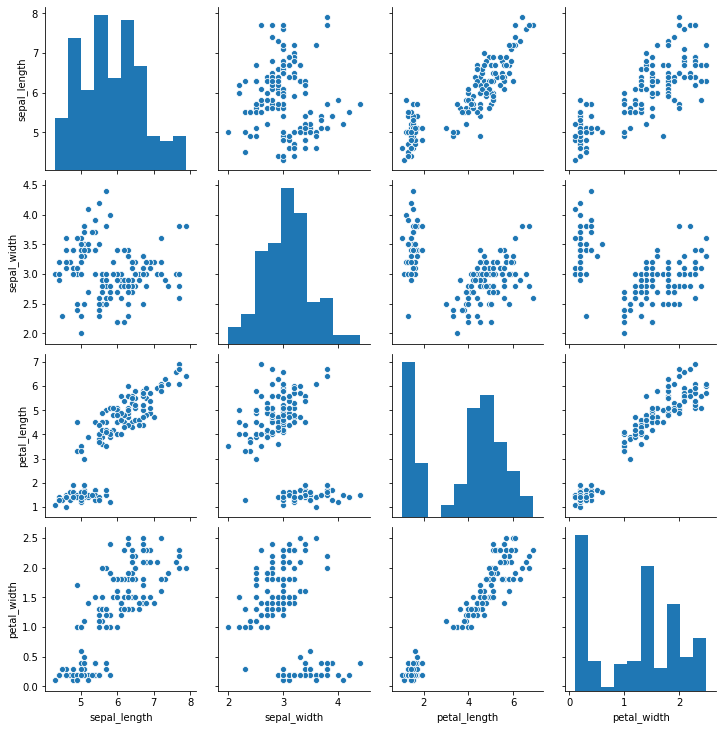

In [31]:
sns.pairplot(iris)

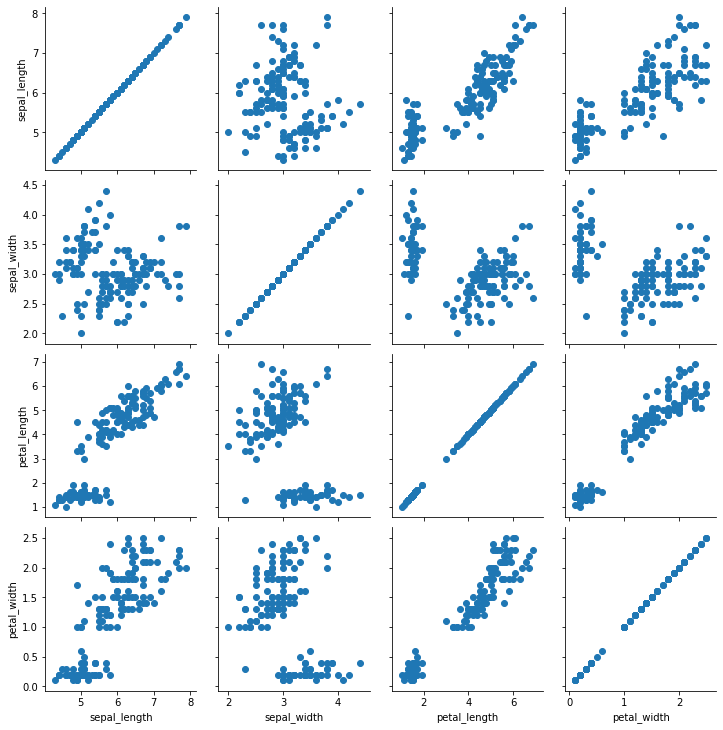

In [36]:
g =sns.PairGrid(iris) #Subplot grid for plotting pairwise relationships in a dataset.
g.map(plt.scatter)

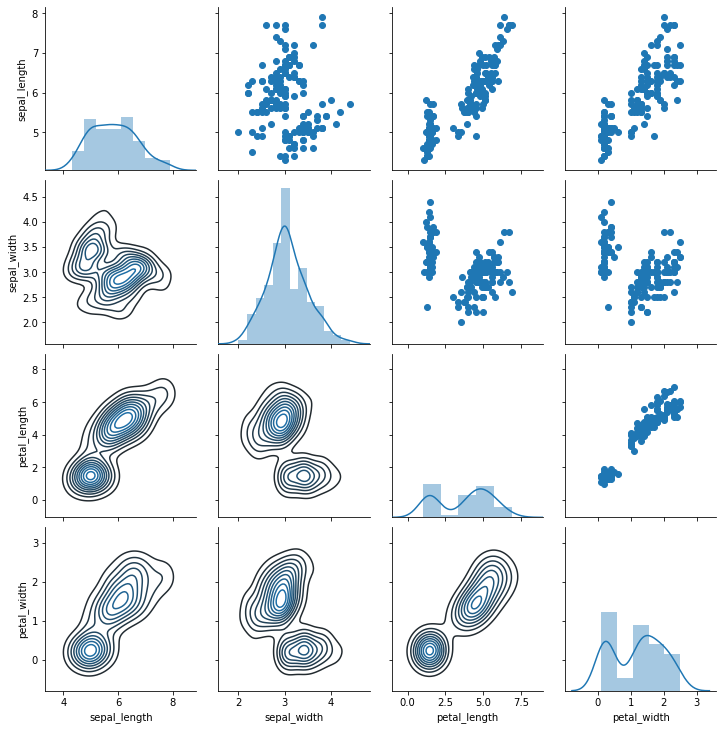

In [37]:
g =sns.PairGrid(iris) 
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# FacetGrid

In [ ]:
#Initialize the matplotlib figure and FacetGrid object.
#This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to *levels* of variables in the dataset.
#The plots it produces are often called "lattice", "trellis", or "small-multiple" graphics.

In [38]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


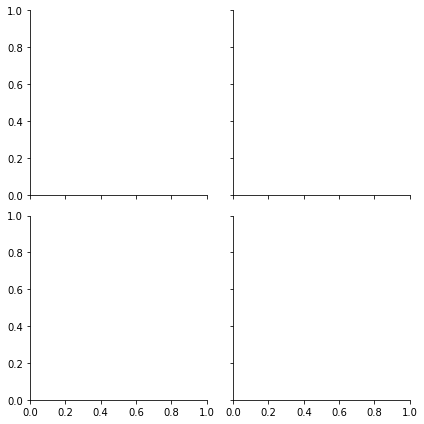

In [41]:
g = sns.FacetGrid(data=tips, col="time", row="smoker") #gives empty grid/ can begin to actually map what types to this group.

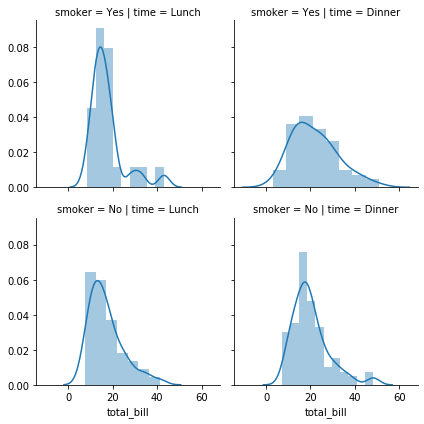

In [42]:
g = sns.FacetGrid(data=tips, col="time", row="smoker")
g.map(sns.distplot, "total_bill")

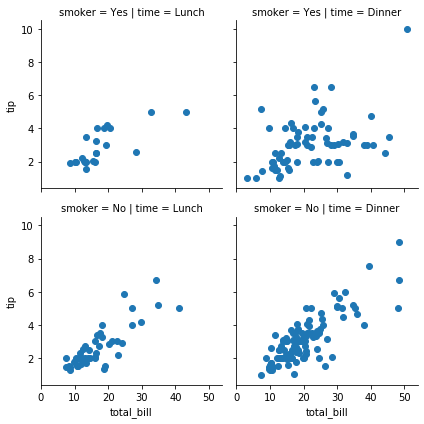

In [45]:
g = sns.FacetGrid(data=tips, col="time", row="smoker")
g.map(plt.scatter, "total_bill", "tip")

# Regression Plots

In [46]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


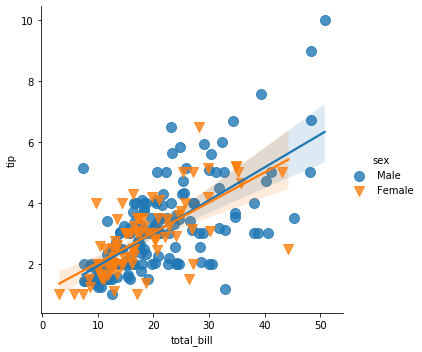

In [51]:
sns.lmplot("total_bill", "tip", data=tips, hue ="sex", markers=["o", "v"], 
          scatter_kws={"s": 100})

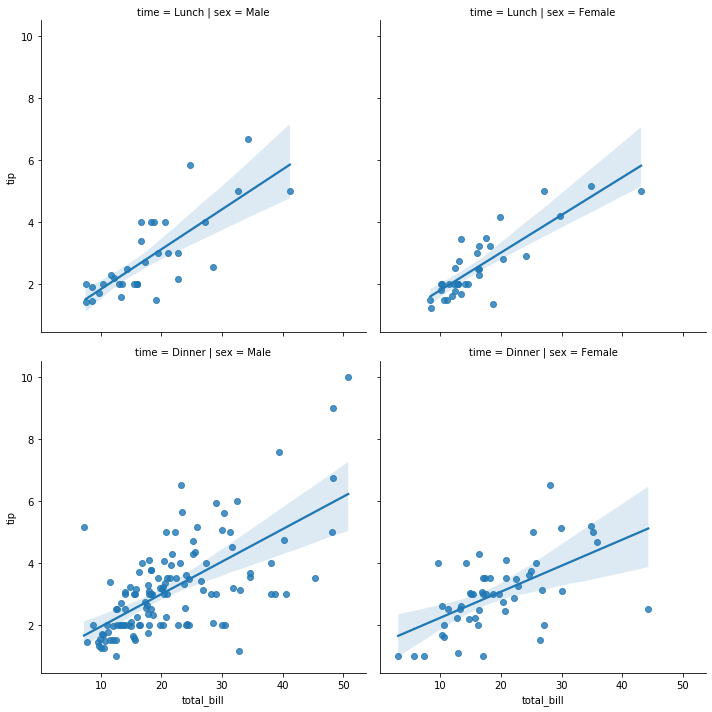

In [53]:
sns.lmplot("total_bill", "tip", data=tips, col="sex", row="time")

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


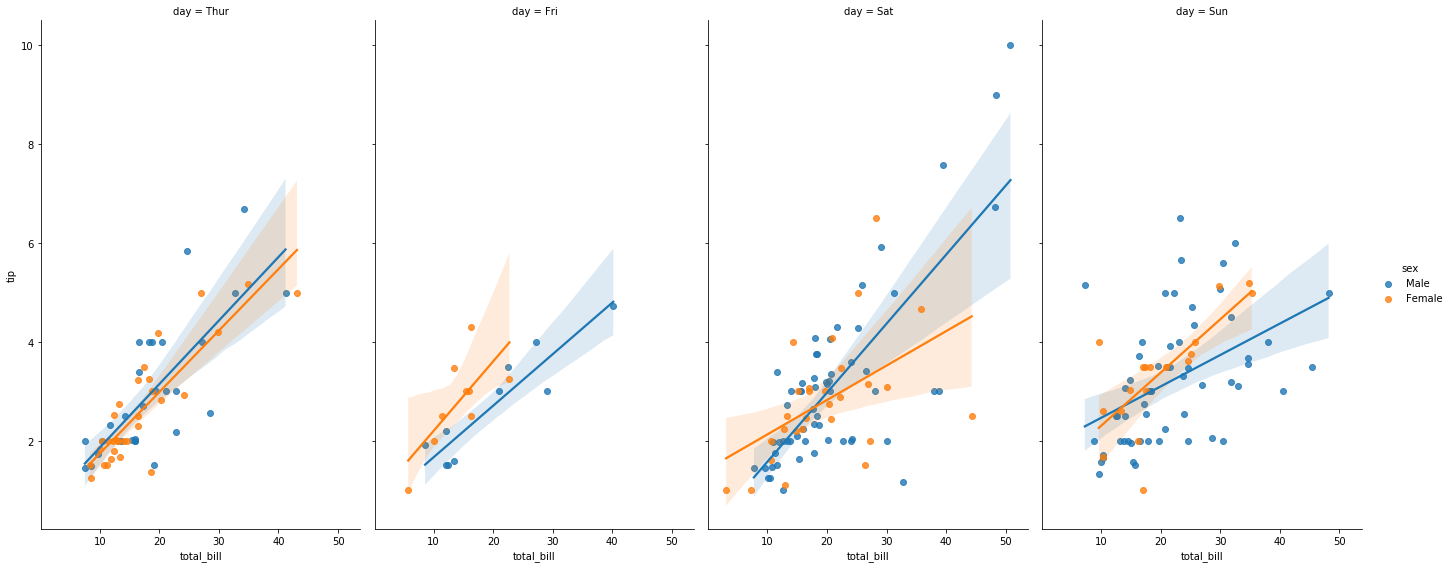

In [55]:
sns.lmplot("total_bill", "tip", data=tips, col="day", hue="sex",
          aspect=0.6, size=8)

# style

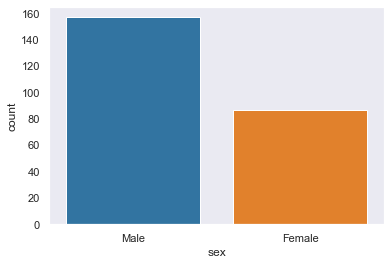

In [77]:
sns.set_style("dark")
sns.countplot(x="sex", data=tips)
# sns.despine(left=True, bottom=True)

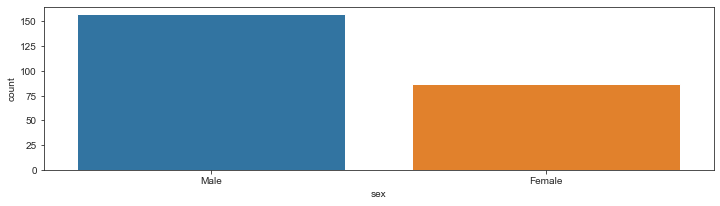

In [66]:
plt.figure(figsize=(12,3))
sns.countplot(x="sex", data=tips)

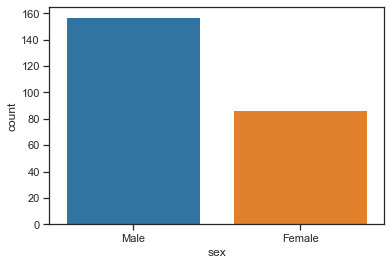

In [73]:
sns.set_context("notebook", font_scale=1)
sns.countplot(x="sex", data=tips)

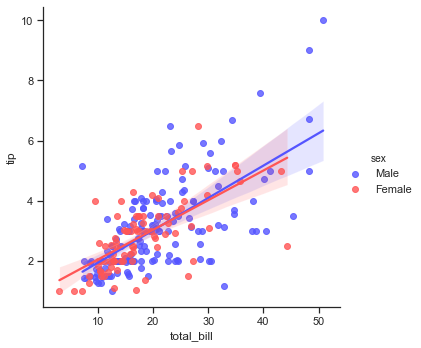

In [75]:
sns.lmplot("total_bill", "tip", data=tips, hue="sex", palette = "seismic")

In [18]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')
mpg=sns.load_dataset('mpg')

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


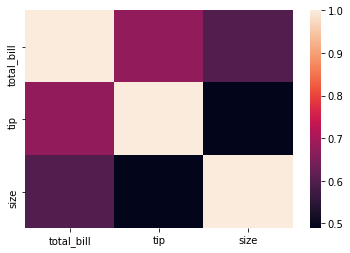

In [21]:
sns.heatmap(tips.corr())

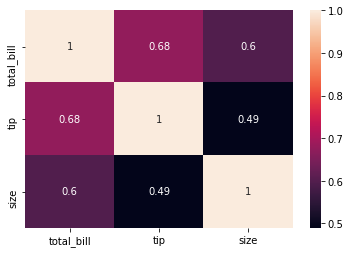

In [22]:
sns.heatmap(tips.corr(), annot=True);

In [23]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [24]:
flights.pivot_table("passengers", index = "year", columns= "month")

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [25]:
a = flights.pivot_table("passengers", index = "year", columns= "month")

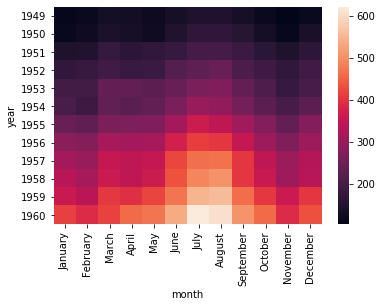

In [26]:
sns.heatmap(a)

In [27]:
# sns.heatmap(a, linecolor="white", linewidths=0.5)

In [28]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


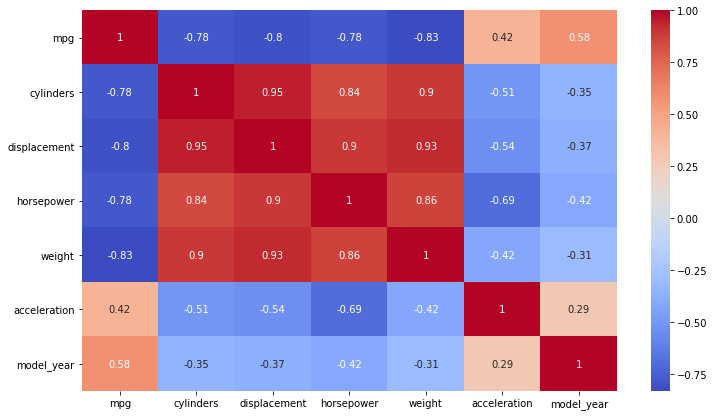

In [29]:
fig=plt.subplots(figsize=(12,7))
sns.heatmap(mpg.corr(), cmap="coolwarm", annot=True)

## GRIDS

In [30]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Pairplot

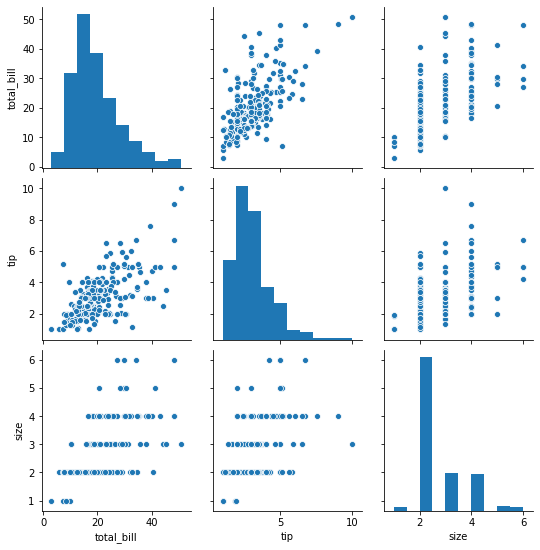

In [31]:
sns.pairplot(tips)

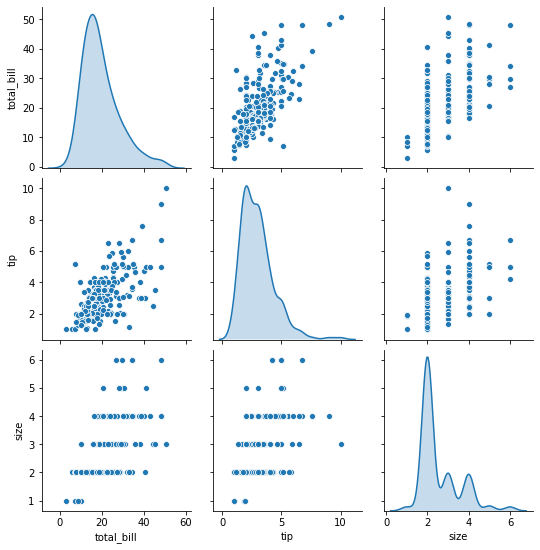

In [32]:
sns.pairplot(tips, diag_kind="kde")

In [33]:
#diag_kind:auto, hist, kde, none

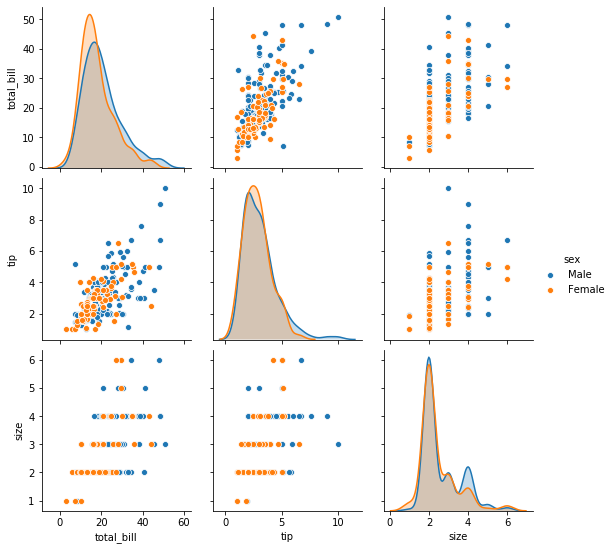

In [34]:
sns.pairplot(tips, hue="sex")

In [35]:
#pairgrid

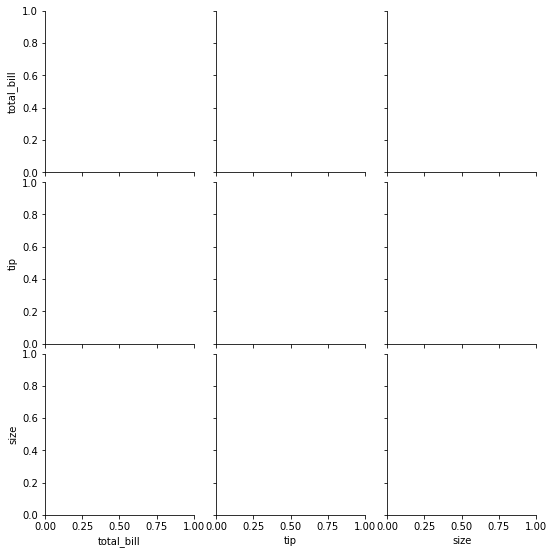

In [36]:
sns.PairGrid(tips)

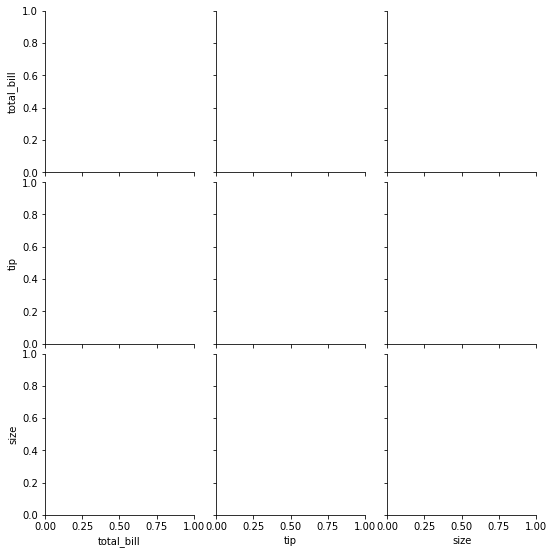

In [37]:
g = sns.PairGrid(tips)

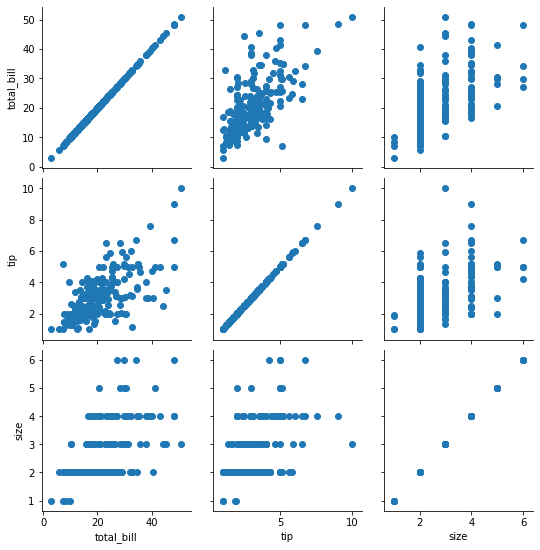

In [38]:
g = sns.PairGrid(tips)
g.map(plt.scatter)

## facetgrid

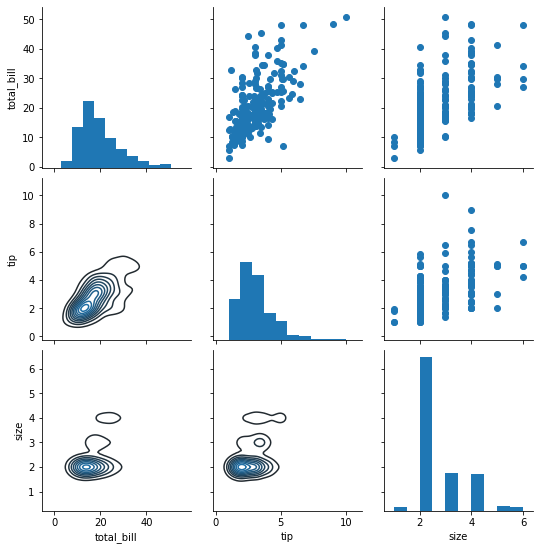

In [39]:
g=sns.PairGrid(tips)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [40]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


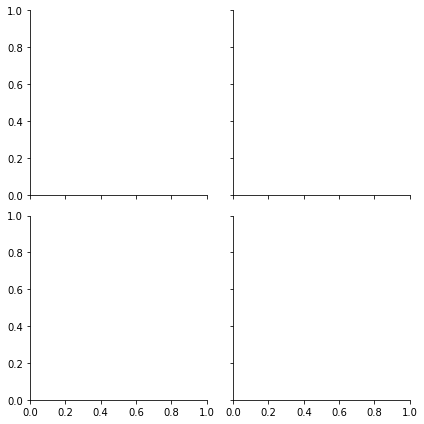

In [41]:
g = sns.FacetGrid(tips, col = "time", row="smoker")

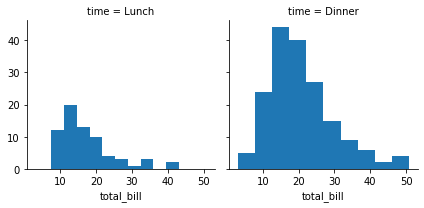

In [42]:
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "total_bill")

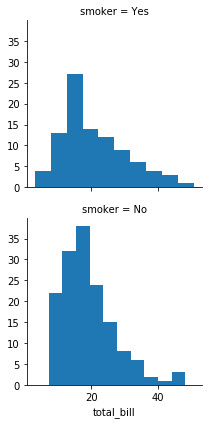

In [43]:
g = sns.FacetGrid(tips, row="smoker")
g.map(plt.hist, "total_bill")

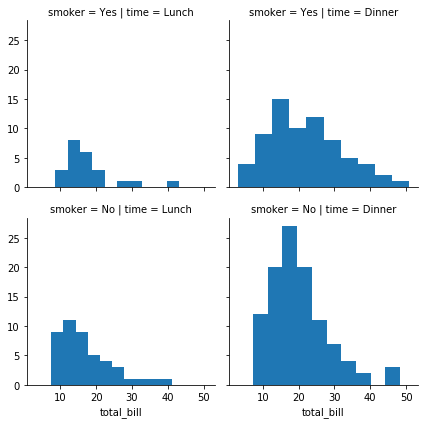

In [44]:
g = sns.FacetGrid(tips, col="time", row = "smoker")
g.map(plt.hist, "total_bill")

## lmplot

In [45]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


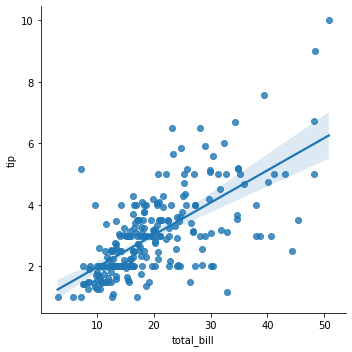

In [46]:
sns.lmplot(x= "total_bill", ci=95, y="tip", data=tips)

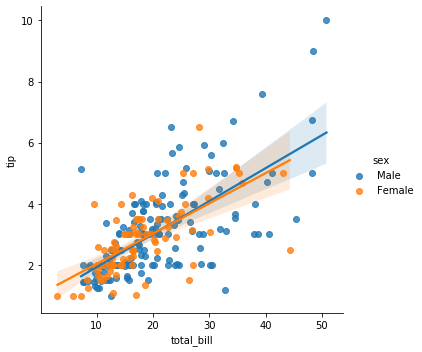

In [47]:
sns.lmplot(x= "total_bill", ci=95, y="tip", hue = "sex", data=tips)

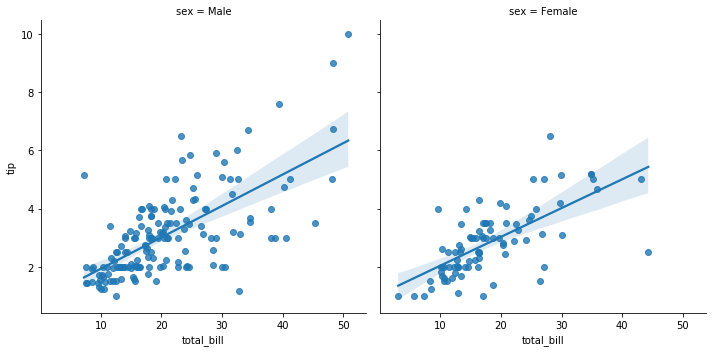

In [48]:
sns.lmplot(x= "total_bill", ci=95, y="tip", data=tips, col="sex")

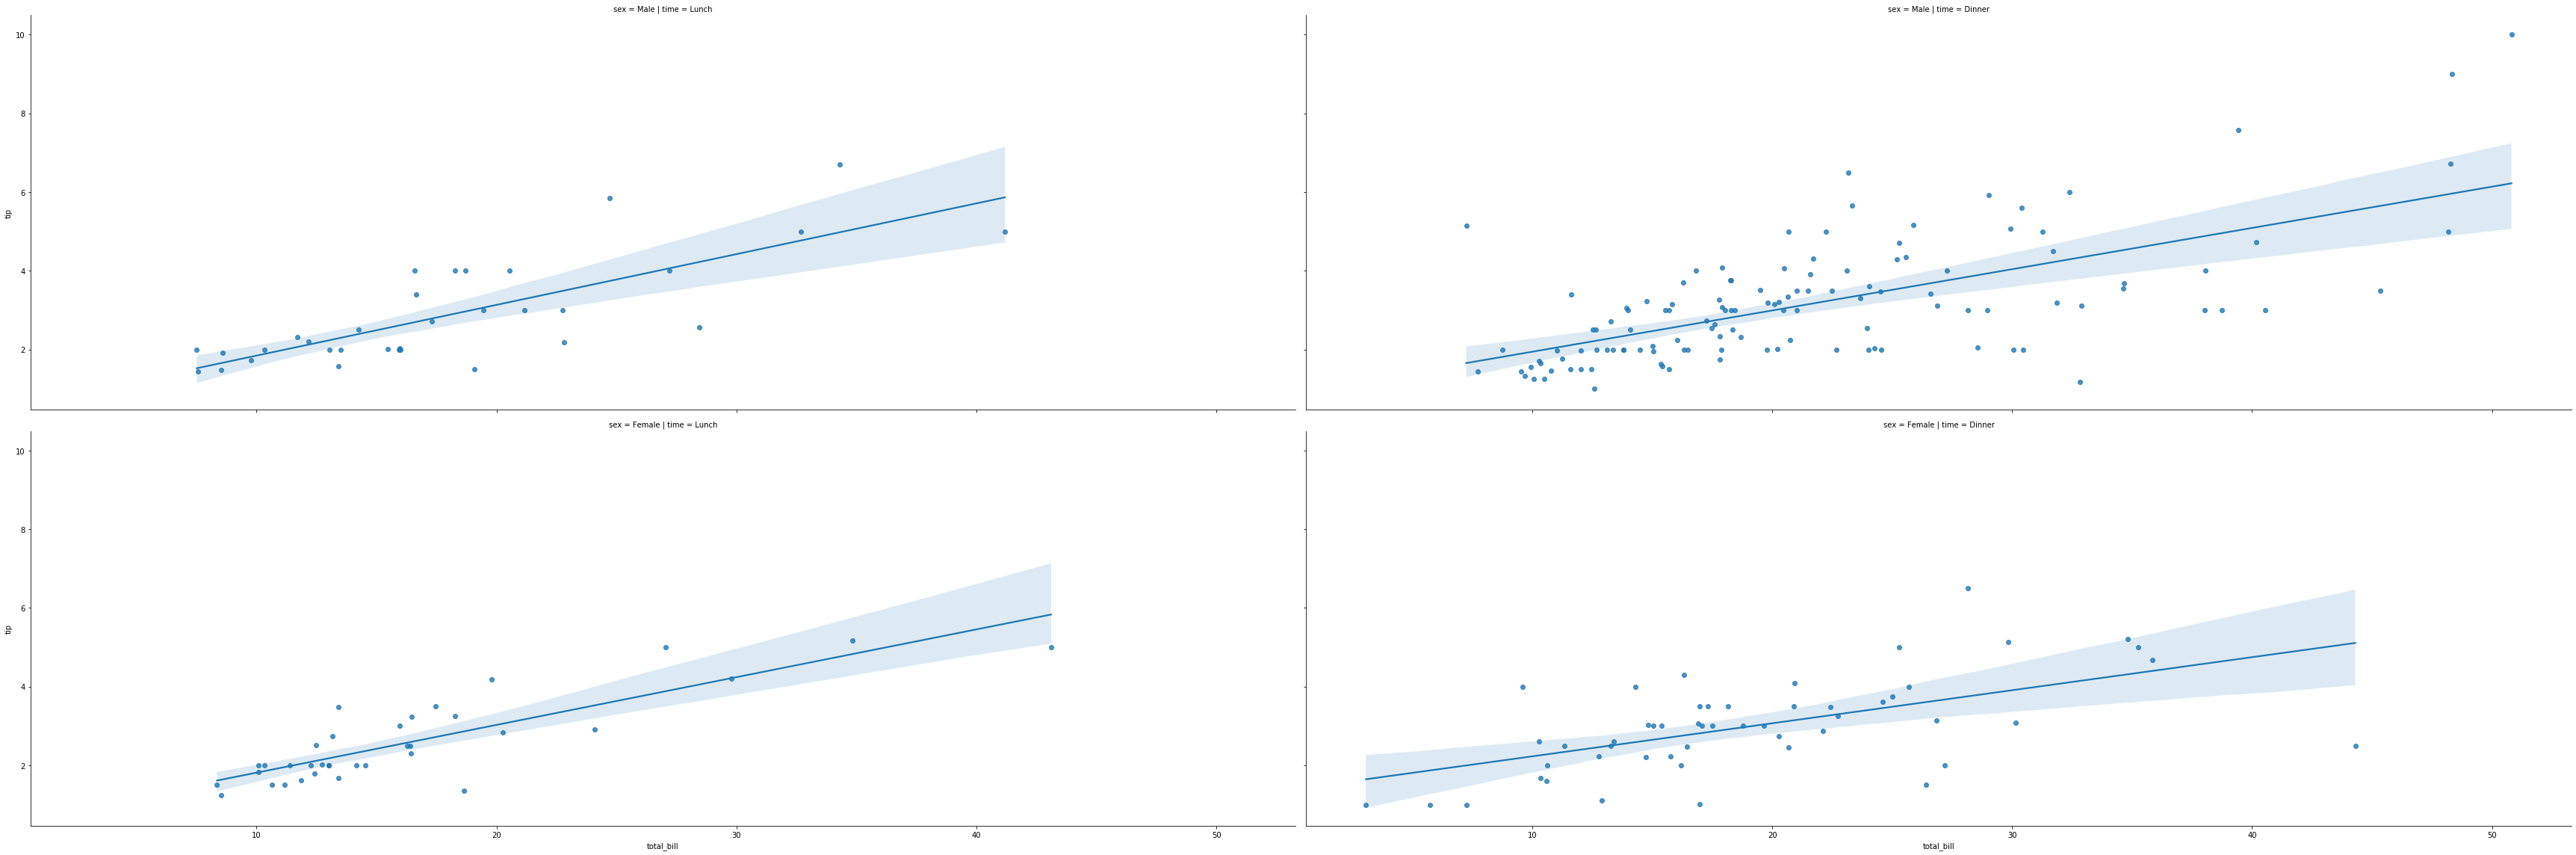

In [49]:
# plt.figure(figsize = (15,10))
sns.lmplot(x= "total_bill", ci=95, y="tip", data=tips, row = "sex", col = "time", aspect = 3, height = 8)

In [50]:
#style and color

In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


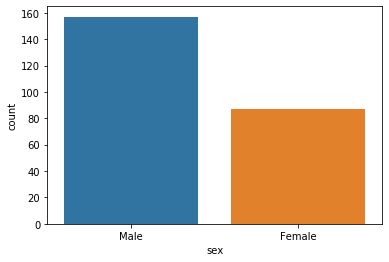

In [52]:
sns.countplot(x = "sex", data = tips)

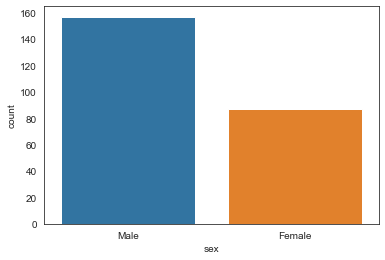

In [53]:
sns.set_style("white")
sns.countplot(x = "sex", data = tips)

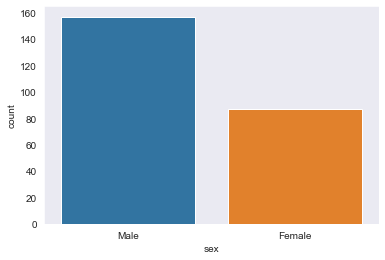

In [54]:
sns.set_style("dark")
sns.countplot(x = "sex", data = tips)

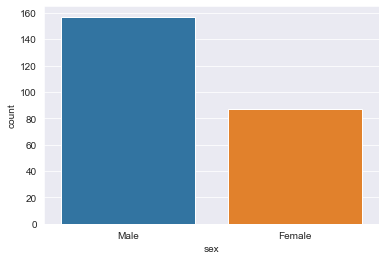

In [55]:
sns.set_style("darkgrid")
sns.countplot(x = "sex", data = tips)

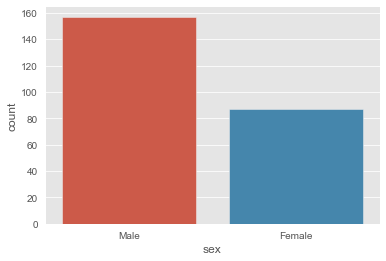

In [56]:
plt.style.use("ggplot")
sns.countplot(x="sex", data=tips)

## spine removal

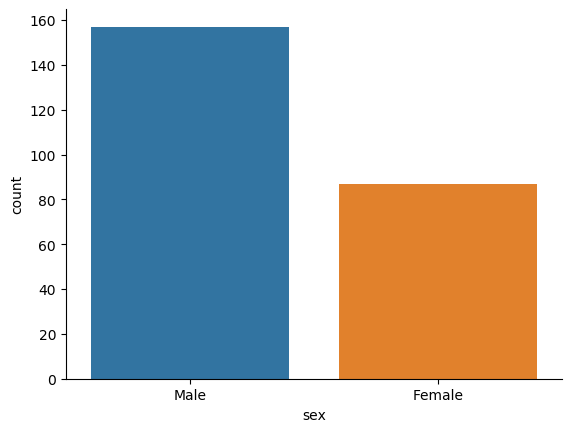

In [57]:
plt.style.use('default')
sns.countplot(x="sex", data=tips)
sns.despine()

In [58]:
x= ['JavaScript',
 'HTML/CSS',
 'SQL',
 'Python',
 'Java',
 'Bash/Shel/PS',
 'C#',
 'PHP',
 'C++',
 'TypeScript',
 'C',
 'Other(s):',
 'Ruby',
 'Go',
 'Assembly']

In [59]:
y=[59219,
 55466,
 47544,
 36443,
 35917,
 31991,
 27097,
 23030,
 20524,
 18523,
 18017,
 7920,
 7331,
 7201,
 5833]

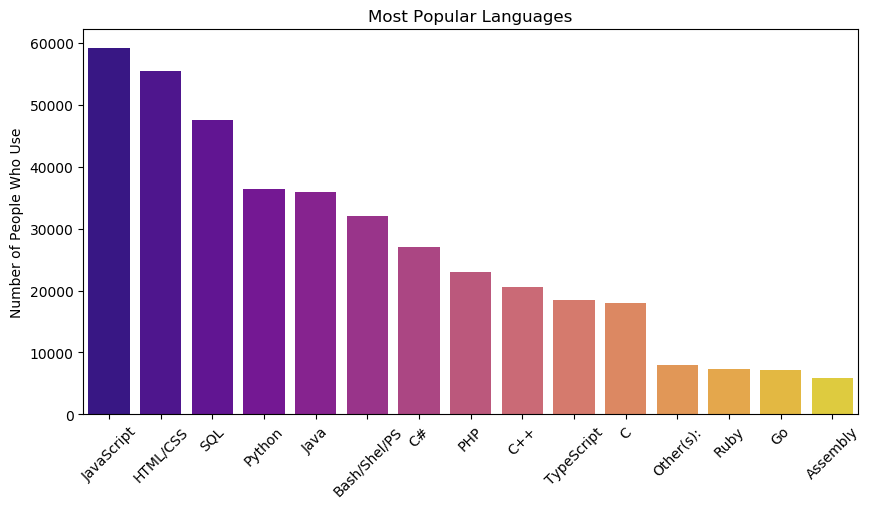

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_context('notebook')
sns.barplot(x,y, palette= "plasma")
ax.set_title("Most Popular Languages")
ax.set_ylabel('Number of People Who Use')
ax.set_xticklabels(x, rotation=45);

In [61]:
df =pd.read_csv("cleaned_autos.csv")

FileNotFoundError: [Errno 2] File cleaned_autos.csv does not exist: 'cleaned_autos.csv'

In [62]:
df.head()

,label,men_means,women_means
0,G1,20,25
1,G2,34,32
2,G3,30,34
3,G4,35,20
4,G5,27,25


In [63]:
df.shape

(5, 3)

In [64]:
df.vehicleType.unique()

AttributeError: 'DataFrame' object has no attribute 'vehicleType'

In [65]:
#variation of price range by vehicle type